# DSCI 503 - Homework 08
### Talaya Francois

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Problem 1: Diamonds Dataset

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep='\t') 
diamonds.loc[:, 'ln_carat'] = np.log(diamonds.loc[:, 'carat'])
diamonds.loc[:, 'ln_price'] = np.log(diamonds.loc[:, 'price'])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


In [3]:
X1_num = diamonds.loc[:, ['ln_carat']].values 
X1_cat = diamonds.loc[:, ['cut', 'color', 'clarity']].values
y1 = diamonds.loc[:, 'ln_price']
print(f"Numerical Feature Array Shape:   {X1_num.shape}")
print(f"Categorical Feature Array Shape: {X1_cat.shape}")
print(f"Label Array Shape:               {y1.shape}")

Numerical Feature Array Shape:   (53940, 1)
Categorical Feature Array Shape: (53940, 3)
Label Array Shape:               (53940,)


In [4]:
encoder = OneHotEncoder(sparse_output=False) # In scikit-learn versions 1.2 and later, "sparse_output" replaces "sparse" argument
encoder.fit(X1_cat)
X1_enc = encoder.transform(X1_cat)
print(f"Encoded Feature Array Shape: {X1_enc.shape}")

Encoded Feature Array Shape: (53940, 20)


In [5]:
X1 = np.hstack([X1_num, X1_enc])
print(f"Feature Array Shape: {X1.shape}")

Feature Array Shape: (53940, 21)


In [6]:
X1_train, X1_hold, y1_train, y1_hold = train_test_split(X1, y1, test_size=0.2, random_state=1) 
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_hold, y1_hold, test_size=0.5, random_state=1)

print(f"Training Features Shape:   {X1_train.shape}")
print(f"Validation Features Shape: {X1_valid.shape}")
print(f"Test Features Shape:       {X1_test.shape}")

Training Features Shape:   (43152, 21)
Validation Features Shape: (5394, 21)
Test Features Shape:       (5394, 21)


### Linear Regression Model with One Feature

In [7]:
dia_mod_1 = LinearRegression()
dia_mod_1.fit(X1_train[:, [0]], y1_train) 
train_r2 = dia_mod_1.score(X1_train[:, [0]], y1_train)
valid_r2 = dia_mod_1.score(X1_valid[:, [0]], y1_valid)

print('Training r-Squared:', round(train_r2,4))
print('Testing r-Squared: ', round(valid_r2,4))

Training r-Squared: 0.933
Testing r-Squared:  0.9348


### Linear Regression Model with Several Features

In [8]:
dia_mod_2 = LinearRegression()
dia_mod_2.fit(X1_train, y1_train) 
train2_r2 = dia_mod_2.score(X1_train, y1_train)
valid2_r2 = dia_mod_2.score(X1_valid, y1_valid)

print('Training r-Squared:', round(train2_r2,4))
print('Testing r-Squared: ', round(valid2_r2,4))

Training r-Squared: 0.9825
Testing r-Squared:  0.9834


In [9]:
test_r2 = dia_mod_2.score(X1_test, y1_test)
print('Testing r-Squared: ', round(test_r2, 4))

Testing r-Squared:  0.9825


## Problem 2: Census Dataset

In [10]:
census = pd.read_csv('census.txt', sep='\t') 
census.head(10)

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
print(census.shape)

(32561, 15)


In [12]:
census.loc[:, 'salary'].value_counts()

salary
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Prepare the Data

In [13]:
X2_num = census.loc[:, ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hrs_per_week', 'educ_num']].values 
X2_cat = census.loc[:, ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
'native_country']].values
y2 = census.loc[:, 'salary']
print(f"Numerical Feature Array Shape:   {X2_num.shape}")
print(f"Categorical Feature Array Shape: {X2_cat.shape}")
print(f"Label Array Shape:               {y2.shape}")

Numerical Feature Array Shape:   (32561, 6)
Categorical Feature Array Shape: (32561, 8)
Label Array Shape:               (32561,)


In [14]:
encoder2 = OneHotEncoder(sparse_output=False) 
encoder2.fit(X2_cat)
X2_enc = encoder2.transform(X2_cat)
print(f"Encoded Feature Array Shape: {X2_enc.shape}")

Encoded Feature Array Shape: (32561, 102)


In [15]:
X2 = np.hstack([X2_num, X2_enc])
print(f"Feature Array Shape: {X2.shape}")

Feature Array Shape: (32561, 108)


In [16]:
X2_train, X2_hold, y2_train, y2_hold = train_test_split(X2, y2, test_size=0.3, random_state=1, stratify=y2) 
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_hold, y2_hold, test_size=0.5, random_state=1, stratify=y2_hold)

print(f"Training Features Shape:   {X2_train.shape}")
print(f"Validation Features Shape: {X2_valid.shape}")
print(f"Test Features Shape:       {X2_test.shape}")

Training Features Shape:   (22792, 108)
Validation Features Shape: (4884, 108)
Test Features Shape:       (4885, 108)


### Logistic Regression Model

In [17]:
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_valid_scaled = scaler.transform(X2_valid) #1

lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_mod.fit(X2_train_scaled, y2_train)


#lr_mod.fit(X2_train, y2_train) #2
train_acc = lr_mod.score(X2_train_scaled, y2_train)
valid_acc = lr_mod.score(X2_valid_scaled, y2_valid)
print('Training Accuracy:   ', round(train_acc,4))
print('Validation Accuracy: ', round(valid_acc,4))

Training Accuracy:    0.8539
Validation Accuracy:  0.8554


### Decision Tree Models

In [18]:
dt_train_acc = []
dt_valid_acc = []

depth_range = range(2, 30)

for d in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=d, random_state=1)
    temp_tree.fit(X2_train, y2_train)
    dt_train_acc.append(temp_tree.score(X2_train, y2_train))
    dt_valid_acc.append(temp_tree.score(X2_valid, y2_valid))

dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

print('Optimal Value of max_depth:           ', round(dt_opt_depth, 4))
print('Training Accuracy for Optimal Model:  ', round(dt_train_acc[dt_idx], 4))
print('Validation Accuracy for Optimal Model:', round(dt_valid_acc[dt_idx], 4))

Optimal Value of max_depth:            6
Training Accuracy for Optimal Model:   0.8585
Validation Accuracy for Optimal Model: 0.8567


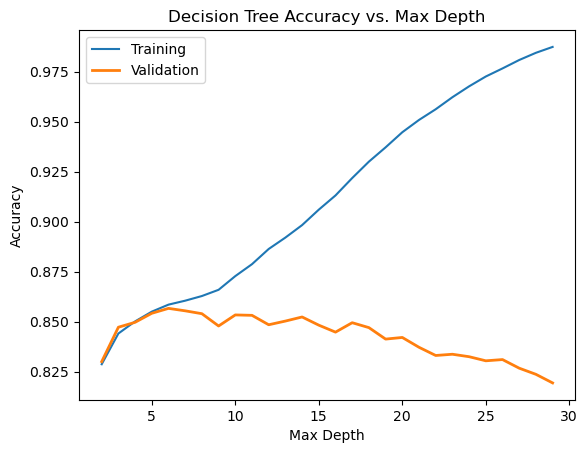

In [19]:
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, lw=2, label='Validation')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.show()

### Random Forest Models

In [20]:
rf_train_acc = []
rf_valid_acc = []

for d in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=d)
    temp_forest.fit(X2_train_scaled, y2_train)
    rf_train_acc.append(temp_forest.score(X2_train_scaled, y2_train))
    rf_valid_acc.append(temp_forest.score(X2_valid_scaled, y2_valid))

rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

print('Optimal Value of max_depth:           ', round(rf_opt_depth, 4))
print('Training Accuracy for Optimal Model:  ', round(rf_train_acc[rf_idx], 4))
print('Validation Accuracy for Optimal Model:', round(rf_valid_acc[rf_idx], 4))

Optimal Value of max_depth:            19
Training Accuracy for Optimal Model:   0.9167
Validation Accuracy for Optimal Model: 0.8665


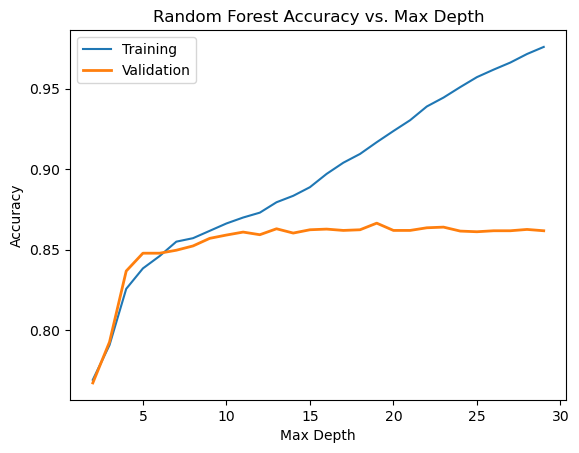

In [21]:
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, lw=2, label='Validation')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Max Depth')
plt.show()

### Evaluate Final Model

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(n_estimators=100, max_depth=19)
final_model.fit(X2_train, y2_train)
fm_tr_acc = final_model.score(X2_train, y2_train)
fm_v_acc = final_model.score(X2_valid, y2_valid)
fm_test_acc = final_model.score(X2_test, y2_test)

print('Training Accuracy for Final Model:   ', round(fm_tr_acc, 4))
print('Validation Accuracy for Final Model: ', round(fm_v_acc, 4))
print('Testing Accuracy for Final Model:    ', round(fm_test_acc, 4))

Training Accuracy for Final Model:    0.9168
Validation Accuracy for Final Model:  0.8663
Testing Accuracy for Final Model:     0.8635


In [23]:
test_pred = final_model.predict(X2_test)
cm = confusion_matrix(y2_test, test_pred)
cm_df = pd.DataFrame(cm)
cm_df.index = ['<=50K', '>50K']        # Rename the rows
cm_df.columns = ['<=50K', '>50K']      # Rename the columns
cm_df

,<=50K,>50K
<=50K,3508,201
>50K,466,710


In [24]:
print(classification_report(y2_test, test_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      3709
        >50K       0.78      0.60      0.68      1176

    accuracy                           0.86      4885
   macro avg       0.83      0.77      0.80      4885
weighted avg       0.86      0.86      0.86      4885

